In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist     #손글씨 데이터

### 데이터 로딩

In [2]:
data = mnist.load_data()

In [3]:
((X_train,y_train),(X_test,y_test)) = data

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 확인

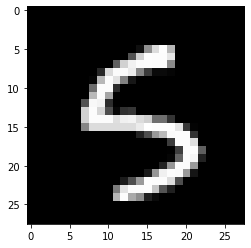

In [5]:
plt.imshow(X_train[15000],cmap='gray')  ##6만장의 사진이 있으니..

In [6]:
y_train[15000]

5

In [7]:
X_train[15000].shape

(28, 28)

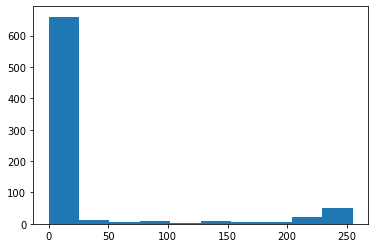

In [8]:
plt.hist(X_train[15000].reshape(-1))
plt.show()

### 데이터 셋 준비

##### 1. X데이터가 현재 2차원으로 되어있다. (28,28) -> 1차원으로 펴줘야한다.

In [9]:
X_train_reshape = X_train.reshape(60000, -1) ##6만장의사진을1차원으로 펴 버리겠다
X_test_reshape = X_test.reshape(10000, -1)

##### 2. 정답데이터 (0~9로 구성)  --> 확률 정보로 변경 시키기

In [10]:
import numpy as np
np.unique(y_train) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- 현재.. 문제와 답을 가지고 학습하는 지도학습이며 다중분류(10개중 어떤 것이 나올지 분류하는)문제이다
- 이를 확률문제로 바꿀 것! (e.g., 0일확률100퍼 1~9일 확률 각각0퍼 ... ==> [100,0,0,0,0,0,0,0,0,0])

In [11]:
import pandas as pd
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [12]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


### 모델생성
- input_dim : 입력하는 데이터의 모양
- 출력층의 퍼셉트론 갯수

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [19]:
# 1. 모델 구조 생성
model = Sequential()

model.add(Dense(10, input_dim=784, activation='sigmoid')) ##뉴런추가(eg.아이리스실습이였으면 4개의특성으로 input_dim은 4쓰면 될거고..)

model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))

In [20]:
# 2. 모델 학습방법, 평가방법
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001), ##이렇게 클래스로 객체생성해서 쓸 수 있음 <기본매개변수로 쓰느냐vs뭔가 써보고싶으냐>
             metrics=["accuracy"]) ##분류에서 사용하는 가장 일반적인 방법 accuracy

In [21]:
# 3. 모델 학습하기
history = model.fit(X_train_reshape,
                    y_train_one_hot,
                    validation_split=0.2,
                    epochs=20)
##배치사이즈 생략시 기본값 32

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 63us/sample - loss: 2.1103 - accuracy: 0.2347 - val_loss: 1.8466 - val_accuracy: 0.3099
Epoch 2/20
48000/48000 [==============================] - 3s 57us/sample - loss: 1.7109 - accuracy: 0.3345 - val_loss: 1.5723 - val_accuracy: 0.3508
Epoch 3/20
48000/48000 [==============================] - 3s 56us/sample - loss: 1.4514 - accuracy: 0.4338 - val_loss: 1.3250 - val_accuracy: 0.4978
Epoch 4/20
48000/48000 [==============================] - 3s 57us/sample - loss: 1.2712 - accuracy: 0.5213 - val_loss: 1.2109 - val_accuracy: 0.5458
Epoch 5/20
48000/48000 [==============================] - 3s 57us/sample - loss: 1.1854 - accuracy: 0.5551 - val_loss: 1.1468 - val_accuracy: 0.5704
Epoch 6/20
48000/48000 [==============================] - 3s 55us/sample - loss: 1.1320 - accuracy: 0.5797 - val_loss: 1.0606 - val_accuracy: 0.6118
Epoch 7/20
48000/48000 [==============================] 

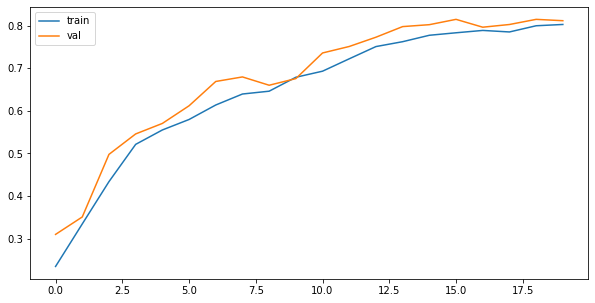

In [22]:
plt.figure(figsize=(10,5))     # 가로, 세로
plt.plot(history.history['accuracy'], label='train') # 훈련용 데이터로 평가한 점수
plt.plot(history.history['val_accuracy'], label='val') #검증용 데이터로 평가한 점수
plt.legend()   #범례
plt.show()

In [23]:
model.evaluate(X_test_reshape, y_test_one_hot)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.6779 - accuracy: 0.8087


[0.6778978430747986, 0.8087]

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
Total params: 7,995
Trainable params: 7,995
Non-trainable params: 0
_________________________________________________________________


Total params = 딥러닝에서 학습하는 가중치의 갯수